In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#To store the path of the image dataset
path_data = 'C:/Users/amrut/University of Groningen - Document/Pattern Recognition/Assignment/Pattern-Recognition-Gr7/Assignment 2/BigCats'

#To set up the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='wrap'
)

#To apply the augmention to the training dataset
train_data = datagen.flow_from_directory(
    path_data, 
    target_size=(150, 150),  
    batch_size=32,           
    class_mode='categorical',
    color_mode='rgb'
)

#To access the loaded data
images, labels = next(train_data)
print("Images batch shape:", images.shape)
print("Labels batch shape:", labels.shape)

Found 170 images belonging to 5 classes.


Images batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 5)


In [4]:
#To display the number of classes in the dataset
count_class = Counter(train_data.classes)
i=0
keys = train_data.class_indices.keys()
label = count_class.values()
#To display how many images are there in each class
print("The name of each class and the number of images in the dataset are:")
for class_name, count in zip(keys, label):
    print(f"{class_name}: {count}")
    i=i+1

print(f"Number of classes in this dataset is: {i}")

The name of each class and the number of images in the dataset are:
Cheetah: 38
Jaguar: 30
Leopard: 31
Lion: 32
Tiger: 39
Number of classes in this dataset is: 5


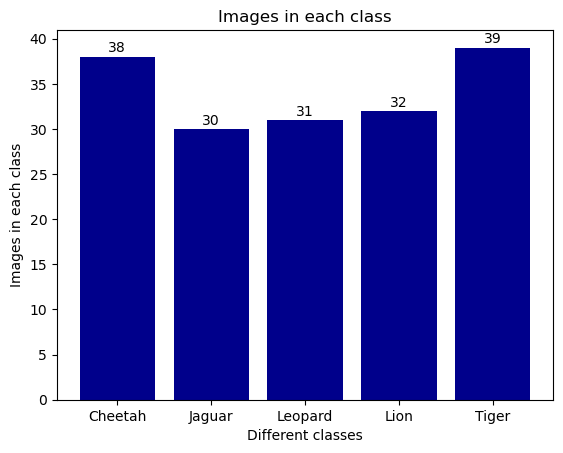

In [5]:
# Creating plot
plt.bar(keys, label, color = 'darkblue')
plt.title("Images in each class")
plt.xlabel("Different classes")
plt.ylabel("Images in each class")
for i, count in enumerate(label):
    plt.text(i, count + 0.5, str(count), ha='center', color='black')  # ha='center' centers the text


# show plot
plt.show()

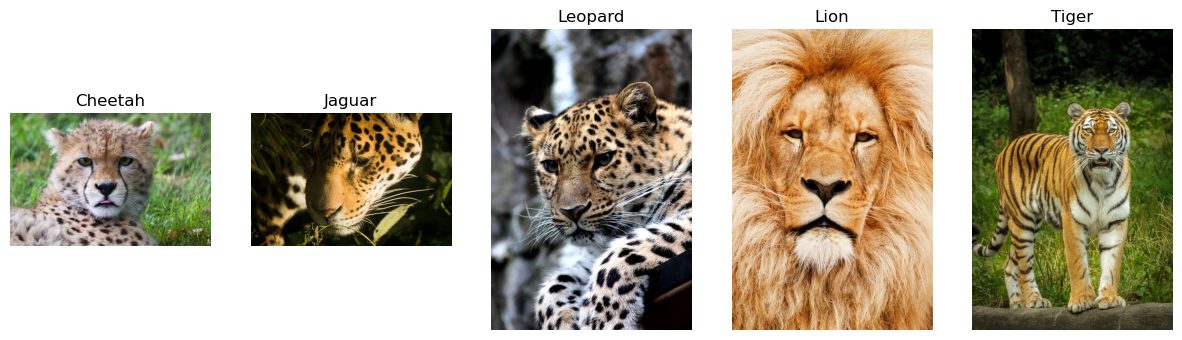

In [6]:
class_names = list(keys)

#To display one image from each class
fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for class_idx, class_name in enumerate(class_names):
    class_image_indices = np.where(train_data.classes == class_idx)[0]
    first_image_path = train_data.filepaths[class_image_indices[0]]
    
    #Display the first image from each class
    img = plt.imread(first_image_path)
    axes[class_idx].imshow(img)
    axes[class_idx].set_title(class_name)
    axes[class_idx].axis('off')

plt.show()


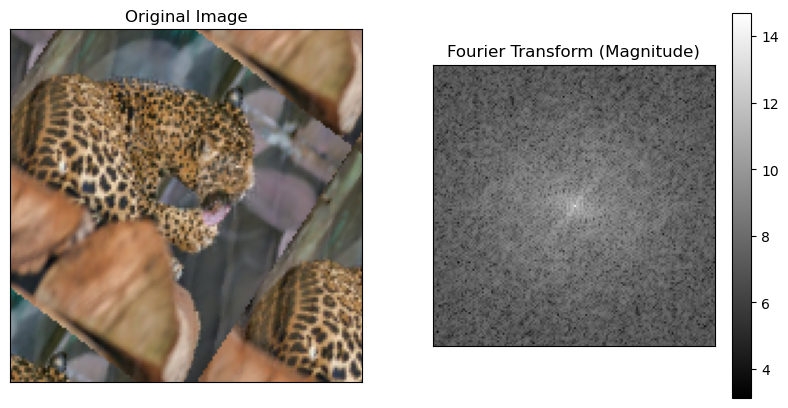

In [7]:
import cv2

img = images[0]  # Select the first image

# Convert the image to grayscale
gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Apply 2D Fourier Transform to the grayscale image
f_transform = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Compute the magnitude spectrum and apply log scale
magnitude_spectrum = np.log(np.abs(f_shift) + 1)  # Add 1 to avoid log(0)

# Display the original image and its Fourier Transform (magnitude spectrum)
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

# Enhanced Fourier Transform visualization
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform (Magnitude)')
plt.colorbar()  # Adding a color bar for better intensity visualization
plt.xticks([]), plt.yticks([])

plt.show()